Steps

    1.EDA
    2. Seprate Your Independent and Dependent Data
    3. Split Data into Training and Test Set
    4.Model Building(Linear Regression)
    5.Model Predition
    6.Model Evaluation(MSE, RMSE,MAE,R2_SCORE)

In [72]:

import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


Using Linear Regression

Load Your Data First

In [73]:
df= pd.read_csv('boston_house.csv')
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Step 2  Seprate Your Independent and Dependent Data

In [74]:
# X= df.iloc[0:506,1:-1]
X= df.iloc[:,1:-1]
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [75]:
Y= df['MEDV'];
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

   Step 3. Split Data into Training and Test Set

In [76]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [77]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666.0,20.2,28.79,34.37
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666.0,20.2,27.49,18.05
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666.0,20.2,35.05,21.22
86,0.05188,0.0,4.49,0,0.449,6.015,45.1,4.4272,3,247.0,18.5,395.99,12.86


In [78]:
Y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: MEDV, Length: 102, dtype: float64

Step 4.Model Building(Linear Regression)

In [79]:
model= LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

Step 5.Model Predition

In [80]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

In [81]:
X_train[:4]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666.0,20.2,2.52,23.29


In [82]:
Y_train[:4]

477    12.0
15     19.9
332    19.4
423    13.4
Name: MEDV, dtype: float64

In [83]:
y_pred_train[:4]

array([10.96952405, 19.41196567, 23.06419602, 12.1470648 ])

In [84]:
def training_evaluation(actual,prediacted):

    mse =mean_squared_error(actual,prediacted)
    rmse = np.sqrt(mean_squared_error(actual,prediacted))
    mae = mean_absolute_error(actual,prediacted)
    r2 = r2_score(actual,prediacted)

    print(f'MSE:{mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'Accurancy:{r2}')
    

In [85]:
training_evaluation(Y_train,y_pred_train)

MSE:21.641412753226312
RMSE: 4.6520331848801675
MAE: 3.3147716267832323
Accurancy:0.7508856358979673


In [86]:
def test_evaluation(actual,prediacted):

    mse =mean_squared_error(actual,prediacted)
    rmse = np.sqrt(mean_squared_error(actual,prediacted))
    mae = mean_absolute_error(actual,prediacted)
    r2 = r2_score(actual,prediacted)

    print(f'MSE:{mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'Accurancy:{r2}')

In [87]:
test_evaluation(Y_test,y_pred_test)

MSE:24.291119474973705
RMSE: 4.928602182665355
MAE: 3.189091965887869
Accurancy:0.6687594935356295


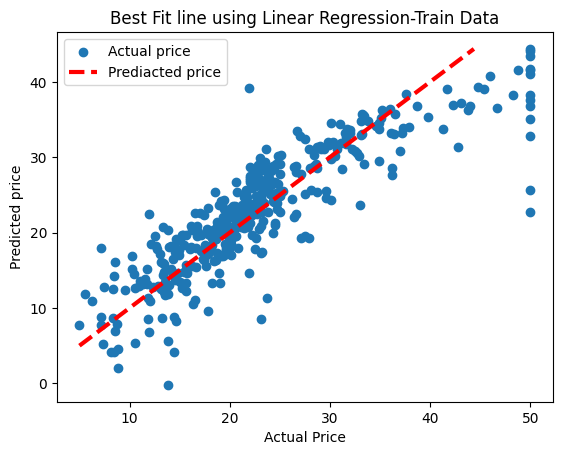

In [88]:
#For Training Data - Graph Aanalysis
plt.scatter(Y_train,y_pred_train,label='Actual price')

plt.plot([Y_train.min(),y_pred_train.max()],[Y_train.min(),y_pred_train.max()],color='r',ls='--',lw=3,label='Prediacted price')
plt.title('Best Fit line using Linear Regression-Train Data')
plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.legend()
plt.show()

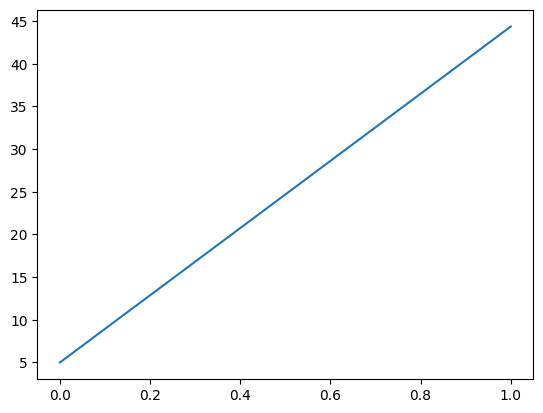

In [89]:
plt.plot([Y_train.min(),y_pred_train.max()])

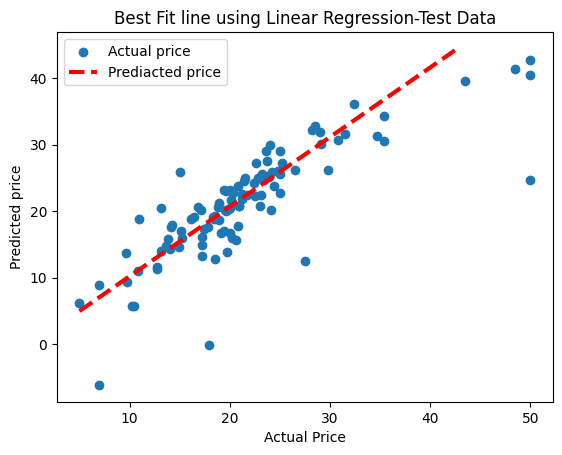

In [90]:
#For Test Data - Graph Aanalysis
plt.scatter(Y_test,y_pred_test,label='Actual price')

plt.plot([Y_test.min(),y_pred_test.max()],[Y_train.min(),y_pred_train.max()],color='r',ls='--',lw=3,label='Prediacted price')
plt.title('Best Fit line using Linear Regression-Test Data')
plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.legend()
plt.show()

USing Polynomial Regression

In [91]:
poly_features = PolynomialFeatures(degree=2)
poly_features

PolynomialFeatures()

In [92]:
X_train_poly=poly_features.fit_transform(X_train)
X_test_poly=poly_features.transform(X_test)

In [93]:
len(X_train_poly),X_train_poly

(404,
 array([[1.00000000e+00, 1.50234000e+01, 0.00000000e+00, ...,
         1.22136270e+05, 8.70554680e+03, 6.20508100e+02],
        [1.00000000e+00, 6.27390000e-01, 0.00000000e+00, ...,
         1.56515184e+05, 3.35090140e+03, 7.17409000e+01],
        [1.00000000e+00, 3.46600000e-02, 3.50000000e+01, ...,
         1.31225062e+05, 2.83641750e+03, 6.13089000e+01],
        ...,
        [1.00000000e+00, 1.50100000e-02, 8.00000000e+01, ...,
         1.52834084e+05, 2.34173060e+03, 3.58801000e+01],
        [1.00000000e+00, 1.11604000e+01, 0.00000000e+00, ...,
         1.20670225e+04, 2.55620950e+03, 5.41492900e+02],
        [1.00000000e+00, 2.28760000e-01, 0.00000000e+00, ...,
         5.01264000e+03, 7.52604000e+02, 1.12996900e+02]]))

In [94]:
len(X_test_poly),X_test_poly

(102,
 array([[1.00000000e+00, 9.17800000e-02, 0.00000000e+00, ...,
         1.56420250e+05, 3.57532000e+03, 8.17216000e+01],
        [1.00000000e+00, 5.64400000e-02, 4.00000000e+01, ...,
         1.57529610e+05, 1.40105700e+03, 1.24609000e+01],
        [1.00000000e+00, 1.05740000e-01, 0.00000000e+00, ...,
         1.52185812e+05, 7.04928770e+03, 3.26524900e+02],
        ...,
        [1.00000000e+00, 1.40507000e+01, 0.00000000e+00, ...,
         1.22850250e+03, 7.43761000e+02, 4.50288400e+02],
        [1.00000000e+00, 5.18800000e-02, 0.00000000e+00, ...,
         1.56808080e+05, 5.09243140e+03, 1.65379600e+02],
        [1.00000000e+00, 9.51200000e-02, 0.00000000e+00, ...,
         1.46865233e+05, 3.42607620e+03, 7.99236000e+01]]))

In [95]:
#Model Building But with Polynimial Features

poly=LinearRegression()
poly.fit(X_train_poly,Y_train)

LinearRegression()

In [96]:
# Model Predition

y_train_pred_poly=poly.predict(X_train_poly)
Y_test_pred_poly=poly.predict(X_test_poly)

In [97]:
#Check Actual Data 
X_train[:3]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83


In [98]:

#Actual y train data 
Y_train[:3]

477    12.0
15     19.9
332    19.4
Name: MEDV, dtype: float64

In [99]:
#Check Data predition When We apply Linear Regression
y_pred_train[:3]

array([10.96952405, 19.41196567, 23.06419602])

In [100]:
#Now Check Data predition When We apply Polynomial Regression and   look here data Acuurancy will increse much better than linear Reg
y_train_pred_poly[:3]

array([11.82400441, 19.01728946, 19.09960234])

In [101]:
X_test[:3]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07


In [102]:
Y_test[:3]

173    23.6
274    32.4
491    13.6
Name: MEDV, dtype: float64

In [103]:
#Linear Reg Predition(For Test Data Diff)
y_pred_test[:3]

array([28.99672362, 36.02556534, 14.81694405])

In [105]:
#Polynomial Reg Predition 
Y_test_pred_poly[:3]

array([26.83685917, 33.41468239, 14.74525523])

In [114]:
#Training Data

def training_evaluation(actual,prediacted):

    mse =mean_squared_error(actual,prediacted)
    rmse = np.sqrt(mean_squared_error(actual,prediacted))
    mae = mean_absolute_error(actual,prediacted)
    r2 = r2_score(actual,prediacted)

    print(f'MSE:{mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'Accurancy:{r2}')

    #For Test Data - Graph Aanalysis
    plt.scatter(Y_test,y_pred_test,label='Actual price')

    plt.plot([Y_test.min(),y_pred_test.max()],[Y_train.min(),y_pred_train.max()],color='r',ls='--',lw=3,label='Prediacted price')
    plt.title('Best Fit line using Linear Regression-Test Data')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted price')
    plt.legend()
    plt.show()

MSE:21.641412753226312
RMSE: 4.6520331848801675
MAE: 3.3147716267832323
Accurancy:0.7508856358979673


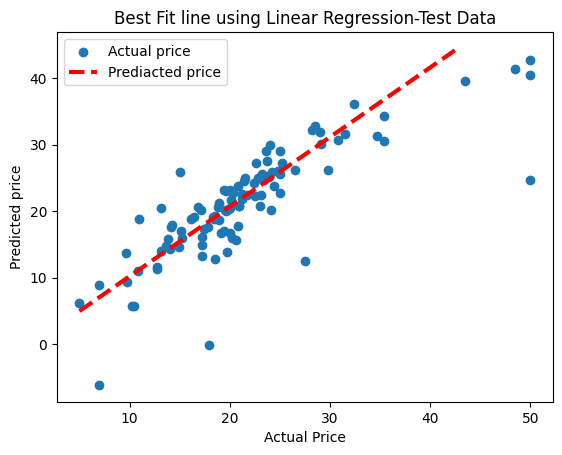

In [115]:
#For Linear Regression
training_evaluation(Y_train,y_pred_train)

In [118]:
#Training Data with poly

def training_evaluation(actual,prediacted):

    mse =mean_squared_error(actual,prediacted)
    rmse = np.sqrt(mean_squared_error(actual,prediacted))
    mae = mean_absolute_error(actual,prediacted)
    r2 = r2_score(actual,prediacted)

    print(f'MSE:{mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'Accurancy:{r2}')

    #For Test Data - Graph Aanalysis
    plt.scatter(Y_train,y_train_pred_poly,label='Actual price')

    plt.plot([Y_test.min(),y_pred_test.max()],[Y_train.min(),Y_train.max()],color='r',ls='--',lw=3,label='Prediacted price')
    plt.title('Best Fit line using Linear Regression-Test Data')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted price')
    plt.legend()
    plt.show()

MSE:5.626164352285372
RMSE: 2.371953699439635
MAE: 1.8395270972853839
Accurancy:0.9352372060486601


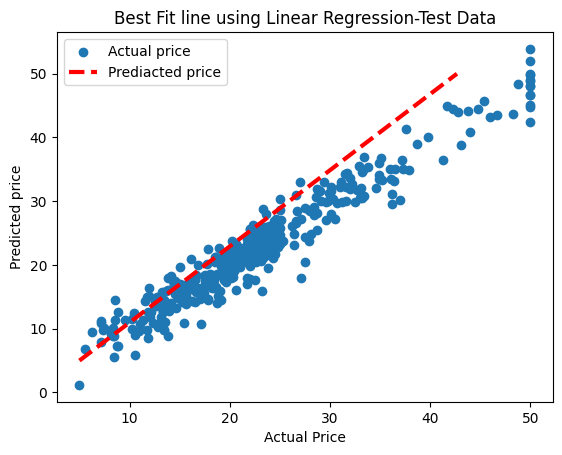

In [119]:
#with Polynomial Regression

training_evaluation(Y_train,y_train_pred_poly)

In [121]:
#For Test Data With Linear Regression

def test_evaluation(actual,prediacted):

    mse =mean_squared_error(actual,prediacted)
    rmse = np.sqrt(mean_squared_error(actual,prediacted))
    mae = mean_absolute_error(actual,prediacted)
    r2 = r2_score(actual,prediacted)

    print(f'MSE:{mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'Accurancy:{r2}')
    #For Test Data - Graph Aanalysis
    plt.scatter(Y_test,y_pred_test,label='Actual price')

    plt.plot([Y_test.min(),y_pred_test.max()],[Y_train.min(),y_pred_train.max()],color='r',ls='--',lw=3,label='Prediacted price')
    plt.title('Best Fit line using Linear Regression-Test Data')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted price')
    plt.legend()
    plt.show()

MSE:24.291119474973705
RMSE: 4.928602182665355
MAE: 3.189091965887869
Accurancy:0.6687594935356295


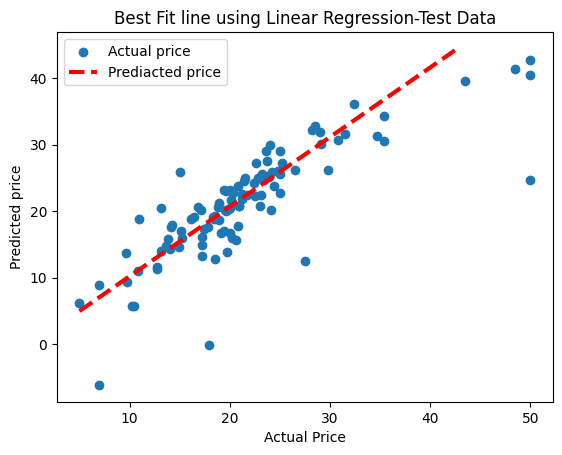

In [122]:
test_evaluation(Y_test,y_pred_test)

In [126]:
#For Test Data With Polynomial Regression

def test_evaluation(actual,prediacted):

    mse =mean_squared_error(actual,prediacted)
    rmse = np.sqrt(mean_squared_error(actual,prediacted))
    mae = mean_absolute_error(actual,prediacted)
    r2 = r2_score(actual,prediacted)

    print(f'MSE:{mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'Accurancy:{r2}')
    #For Test Data - Graph Aanalysis
    plt.scatter(Y_test,Y_test_pred_poly,label='Actual price')

    plt.plot([Y_test.min(),y_pred_test.max()],[Y_train.min(),y_pred_train.max()],color='r',ls='--',lw=3,label='Prediacted price')
    plt.title('Best Fit line using Linear poly-Test Data')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted price')
    plt.legend()
    plt.show()

MSE:14.566436041463819
RMSE: 3.816600063074964
MAE: 2.6431288636198222
Accurancy:0.801367999662331


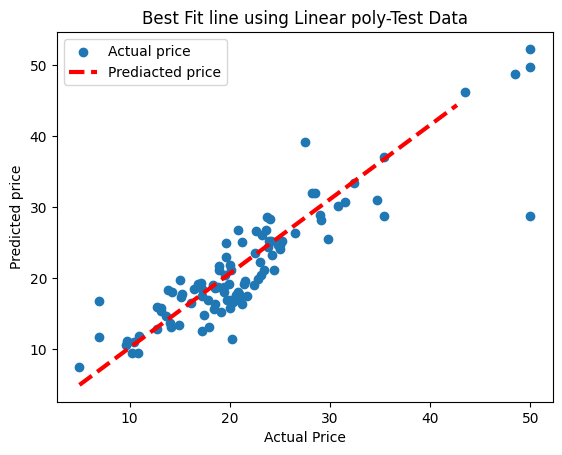

In [127]:
#For polynomial Regression
test_evaluation(Y_test,Y_test_pred_poly)